In [1]:
from src import data_loader, features, model, evaluate, utils
import yaml

from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
config = yaml.safe_load(open('config/config.yaml'))

df = data_loader.load_data(config['data']['raw_path'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Pre-Processing

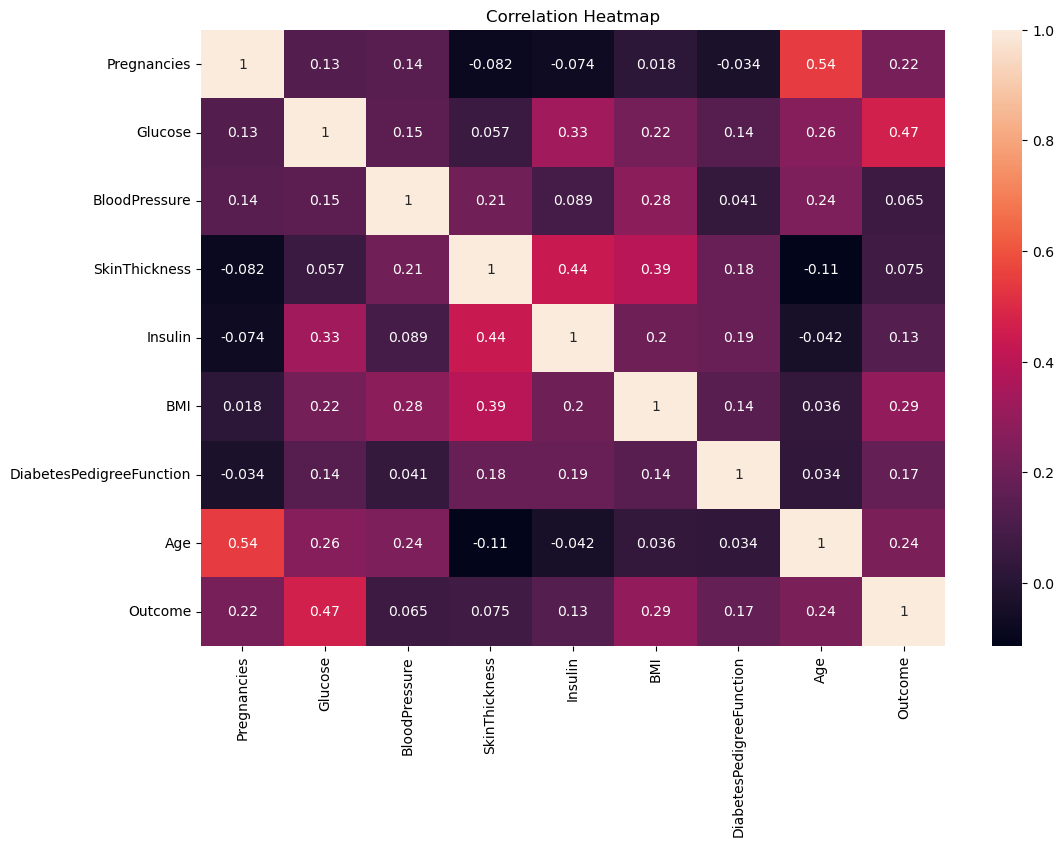

In [3]:
utils.heatmap(df)

In [4]:
# Target Feature selection
X = df.drop('Outcome', axis='columns')
y = df['Outcome']

In [5]:
# Scaling data
X = features.scale_features(X)

In [6]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Naive Bayes

In [7]:
# Naive Bayes Classifier
model_type = config['models']['naive_bayes']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

nb = model_obj

In [8]:
evaluate.evaluate(model_obj, X_test, y_test)

GaussianNB()

 Confusion matrix: 
[[79 20]
 [16 39]]


Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Logistic Regression

In [9]:
# Logistic Regressor
model_type = config['models']['logistic_regression']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

lr = model_obj

In [10]:
evaluate.evaluate(model_obj, X_test, y_test)

LogisticRegression()

 Confusion matrix: 
[[79 20]
 [18 37]]


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Decision Tree

In [11]:
# Decision Tree Classifier
model_type = config['models']['decision_tree']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

dt = model_obj

In [12]:
evaluate.evaluate(model_obj, X_test, y_test)

DecisionTreeClassifier(max_depth=10)

 Confusion matrix: 
[[77 22]
 [16 39]]


Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



# Random Forest

In [13]:
# Random Forest Classifier
model_type = config['models']['random_forest']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

rfc = model_obj

In [14]:
evaluate.evaluate(model_obj, X_test, y_test)

RandomForestClassifier(max_depth=10, random_state=42)

 Confusion matrix: 
[[78 21]
 [18 37]]


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Model Comparision

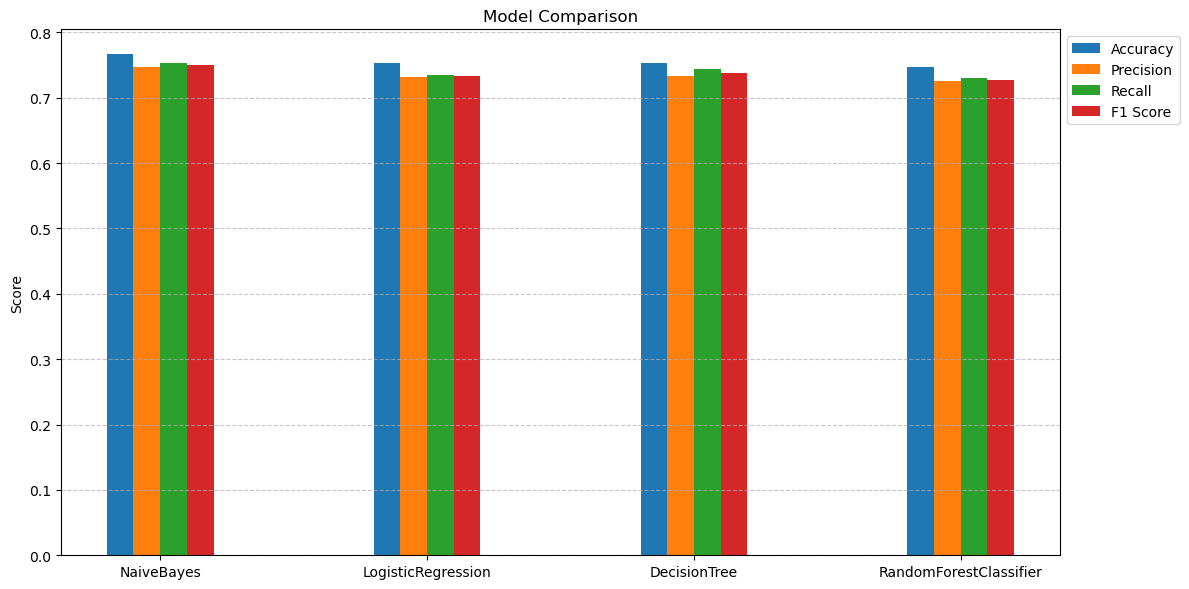

In [15]:
model_obj_list = [nb, lr, dt, rfc]
model_name_list = ['NaiveBayes', 'LogisticRegression', 'DecisionTree', 'RandomForestClassifier']

evaluate.visual_compare(model_name_list, model_obj_list, X_test, y_test)